### <b>Data reminder  IST341_Participant_8 HMWK 8</b>

In Colab, be sure to upload your <tt>.csv</tt> cleaned data file.

For example, to run the cell below you will need the <tt>iris_cleaned.csv</tt> file -- it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link)

Download it to your machine and then upload it to Colab into the _folder_ &nbsp; icon at left.

In [ ]:
#
# Modern modeling ~ iris_modeler:  All-in-one iris clasification via DT + RF
#

### Iris classification via <b>Decision Trees</b> (here) and Random Forests (below)

This is the whole ML workflow! You can show/no-show parts with <tt>if True</tt> and <tt>if False</tt>

+ Section 1: Library imports
+ Section 2: Read the already-cleaned iris data  (it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link) as <tt>iris_cleaned.csv</tt>)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" depth
+ Section 11:  Let's build a final model + find _feature importances_

## First, <b>Decision Trees</b>

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a classifier with best_depth =", best_depth)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = dtree_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
best_accuracy = 0.0  # also not correct...
for depth in range(1,6):    # Note that we are cross-validating using only our TRAINING data!
    dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)   # build a knn_model for every k
    cv_scores = cross_val_score( dtree_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"depth: {depth:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_depth = depth                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_depth = {best_depth}  \n    yields the highest cv accuracy: {best_accuracy}\n")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", dtree_model_final.feature_importances_)

Cross-validating...
best_depth = 2  
    yields the highest cv accuracy: 0.9197628458498024

Created and trained a classifier with best_depth = 2


### Optional:  Let's format things more carefully...

In [ ]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!  use the model you want:
predicted_labels = dtree_model_final.predict(X_test)      # THIS IS THE KEY LINE:  predict
compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :    virginica virginica      
row   1 :   versicolor versicolor     
row   2 :       setosa setosa         
row   3 :       setosa setosa         
row   4 :    virginica virginica      
row   5 :       setosa setosa         
row   6 :   versicolor versicolor     
row   7 :       setosa setosa         
row   8 :       setosa setosa         
row   9 :   versicolor versicolor     
row  10 :   versicolor versicolor     
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor versicolor     
row  14 :       setosa setosa         
row  15 :    virginica virginica      
row  16 :       setosa setosa         
row  17 :       setosa setosa         
row  18 :   versicolor versicolor     
row  19 :    virginica virginica      
row  20 :       setosa setosa         
row  21 :    virginica virginica      
row  22 :       setosa setosa         
row  23 :   versicolor versicolor     
row  24 :   versic

29

Optional: See the Decision tree...

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petalwid <= 0.8\ngini = 0.667\nsamples = 141\nvalue = [47.0, 46.0, 48.0]\nclass = virginica", fillcolor="#fefdff"] ;
1 [label="gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petalwid <= 1.75\ngini = 0.5\nsamples = 94\nvalue = [0.0, 46.0, 48.0]\nclass = virginica", fillcolor="#faf7fe"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.18\nsamples = 50\nvalue = [0, 45, 5]\nclass = versicolor", fillcolor="#4fe88f"] ;
2 -> 3 ;
4 [label="gini = 0.044\nsamples = 44\nvalue = [0, 1, 43]\nclass = virginica", fillcolor="#843ee6"] ;
2 -> 4 ;
{rank=same ; 0} ;
{rank=same ; 2} ;
{rank=same ; 1; 3; 4} ;
}


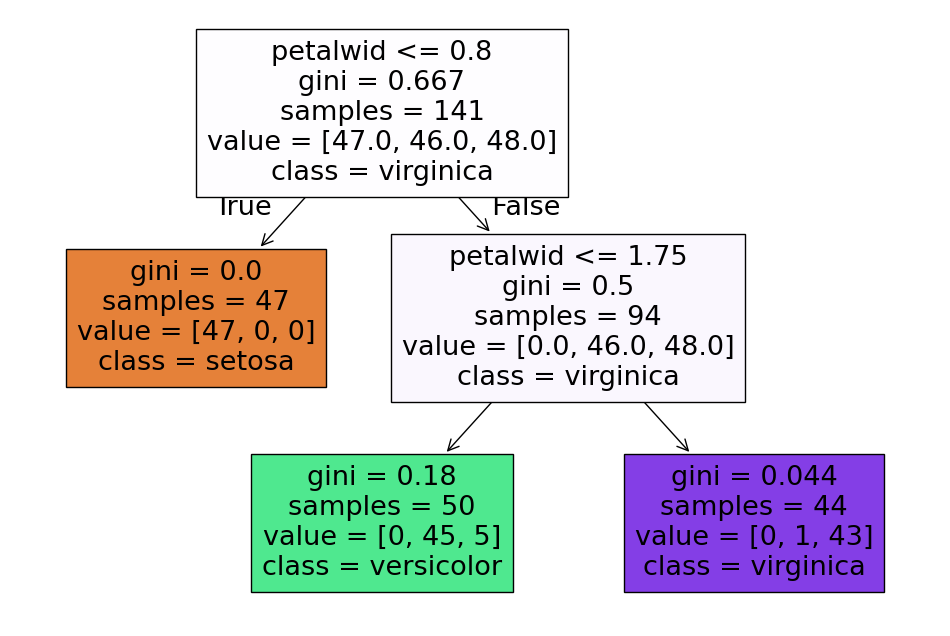

In [ ]:
import matplotlib.pyplot as plt

FEATURES = COLUMNS[0:4]

#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv
model = dtree_model_final

tree.export_graphviz(model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

#
# Tree display...
#
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(model,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

plt.show()

### Optional:  Use the predictive model!

We can use the predictive model to make predictions and try it out!

In [ ]:
#
# Ok!  We have our model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features, model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_species_list = model.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_species_list[0]))  # unpack the one element it contains
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [4.2,3.1,2.0,0.4],
                   [5.8,2.7,4.1,1.0],
                   [4.6,3.6,3.0,2.2],
                   [6.7,3.3,5.7,2.1],
                   [4.2,4.2,4.2,4.2],
                   [1.0,42,4.7,0.01],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    predicted_species = predictive_model( Features, dtree_model_final )
    name = SPECIES[predicted_species]                          # look up the species
    print(f"From the Features {Features}, I predict : {name}")

From the Features [4.2, 3.1, 2.0, 0.4], I predict : setosa
From the Features [5.8, 2.7, 4.1, 1.0], I predict : versicolor
From the Features [4.6, 3.6, 3.0, 2.2], I predict : virginica
From the Features [6.7, 3.3, 5.7, 2.1], I predict : virginica
From the Features [4.2, 4.2, 4.2, 4.2], I predict : virginica
From the Features [1.0, 42, 4.7, 0.01], I predict : setosa


### Predictive models aren't perfect!
+ Notice that the fourth prediction above is (probably) wrong
  + It probably predicted _versicolor_, but it was actually a _virginica_
  + In essence, it was a _virginica_ iris that "looked more like" a _versicolor_ ... ***from these four features!***
  + A botanist would use more than these four features to classify difference species...

+ **Key**: Even when the modeling process runs "perfectly," the models are likely to be imperfect...
+ ... it's just that we won't know where the imperfections are -- until future observations arrive!

### That's it! Our model is complete...

... not perfect, but **complete**

What does this mean?

It means that the model -- the function (above) -- is ***already*** prepared to provide an output for every possible input!

We can see this in a plot of the outputs for every input in the "sepal" plane (length vs. width) as well as the "petal" plane:

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 4.0
sepalwid = 2.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = dtree_model_final


col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the lower-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


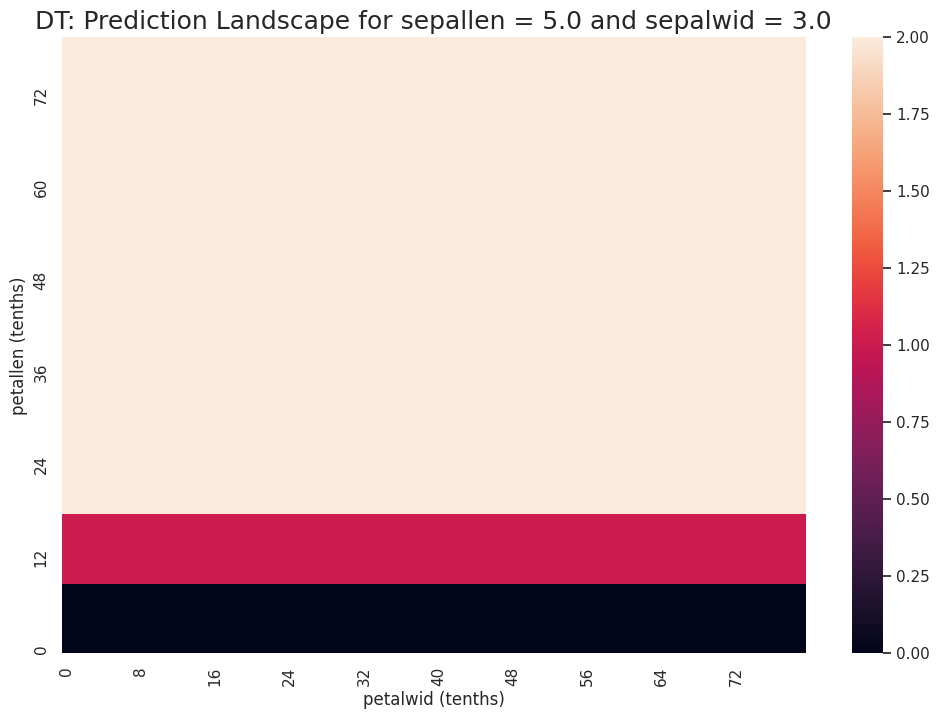

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="petalwid (tenths)", ylabel="petallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])
ax.set_title("DT: Prediction Landscape for sepallen = 5.0 and sepalwid = 3.0", fontsize=18)


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

<br>
<hr>
<br>

## Next, <b>Random Forests</b>

Random Forests are simply a LOT of decision trees...

After you have a lot of decision trees, they all vote on how to classify a new input observation!

The Machine Learning workflow is exactly the same: only the algorithm name changes:

### Iris classification via Decision Trees (above) and <b>Random Forests</b> (here)

This is simply a repeat of whole ML workflow, because it's an amazing advantage to have the whole process in mind! (No harm in repeating it here!) You can show/no-show parts with <tt>if True</tt> and <tt>if False</tt>

+ Section 1: Library imports
+ Section 2: Read the already-cleaned iris data  (you're set - you used it above)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" depth
+ Section 11:  Let's build a final model + find _feature importances_

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier
best_d = 1            # we don't know what depth to use, so let's guess 1 (not a good guess)
best_num_trees = 42   # we don't know how many trees to use, so let's guess 42
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)  # 0.5 of the data each tree
rforest_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print(f"Built a Random Forest with depth={best_d} and number of trees={best_num_trees}")

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = rforest_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 1         # range(1,6)
best_num_trees = 50   # [50,150,250]
best_accuracy = 0
for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, n_estimators=ntrees,max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if True: print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy;   best_d = d;      best_num_trees = ntrees
if True: print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

# Section 11:  Here's where the model-building happens with the best-found parameters:
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, n_estimators=best_num_trees, max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", rforest_model_tuned.feature_importances_)

Cross-validating...
depth:  1 ntrees:  50 cv accuracy:  0.7854
depth:  1 ntrees: 150 cv accuracy:  0.7324
depth:  1 ntrees: 250 cv accuracy:  0.7960
depth:  2 ntrees:  50 cv accuracy:  0.9636
depth:  2 ntrees: 150 cv accuracy:  0.9636
depth:  2 ntrees: 250 cv accuracy:  0.9636
depth:  3 ntrees:  50 cv accuracy:  0.9636
depth:  3 ntrees: 150 cv accuracy:  0.9636
depth:  3 ntrees: 250 cv accuracy:  0.9636
depth:  4 ntrees:  50 cv accuracy:  0.9545
depth:  4 ntrees: 150 cv accuracy:  0.9545
depth:  4 ntrees: 250 cv accuracy:  0.9636
depth:  5 ntrees:  50 cv accuracy:  0.9455
depth:  5 ntrees: 150 cv accuracy:  0.9636
depth:  5 ntrees: 250 cv accuracy:  0.9636
best_depth: 2 and best_num_trees: 50 are our choices. Acc: 0.9636363636363636
Created and trained a classifier with best_depth = 2


One of the forest's trees is DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1204085849)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petalwid <= 0.7\ngini = 0.664\nsamples = 54\nvalue = [23, 21, 26]\nclass = virginica", fillcolor="#f7f2fd"] ;
1 [label="gini = 0.0\nsamples = 17\nvalue = [23, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petalwid <= 1.75\ngini = 0.494\nsamples = 37\nvalue = [0, 21, 26]\nclass = virginica", fillcolor="#e7d9fa"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.33\nsamples = 19\nvalue = [0, 19, 5]\nclass = versicolor", fillcolor="#6deca2"] ;
2 -> 3 ;
4 [label="gini = 0.159\nsamples = 18\nvalue = [0, 2, 21]\

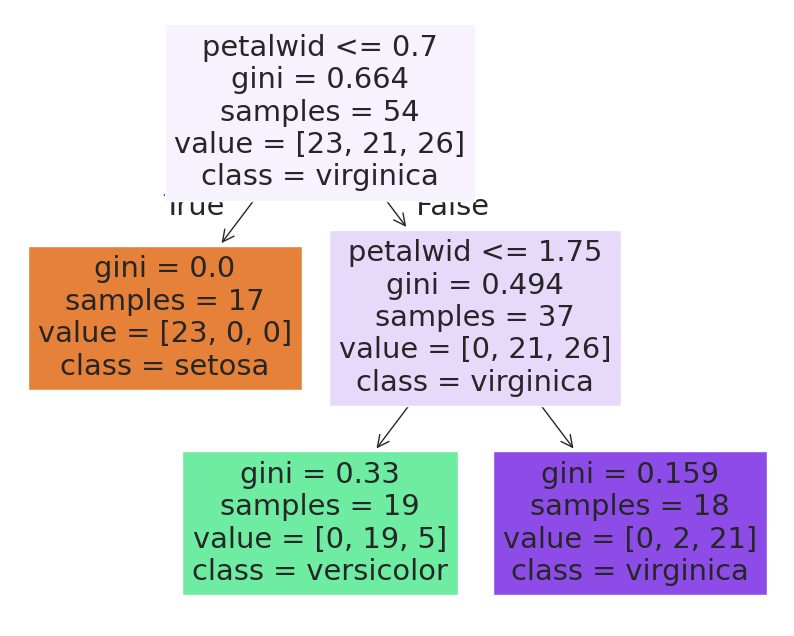

In [ ]:
#
# we can get the individual trees, if we want...  Let's try it on tree #28
#
tree_index = 28   # which tree
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

# One tree:
fig = plt.figure(figsize=(10,8))
tree_plot = tree.plot_tree(one_rf_tree,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

In [ ]:
#
# final predictive model (random forests), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoF = [
[4.8, 3.1, 1.6, 0.2 ],   # actually setosa
[5.7, 2.9, 4.2, 1.3 ],   # actually versicolor
[5.8, 2.7, 5.1, 1.9 ],   # actually virginica
[5.2, 4.1, 1.5, 0.1 ],   # actually setosa
[5.4, 3.4, 1.5, 0.4 ],   # actually setosa
[5.1, 2.5, 3.0, 1.1 ],   # actually versicolor
[6.2, 2.9, 4.3, 1.3 ],   # actually versicolor
[6.3, 3.3, 6.0, 2.5 ],   # actually virginica
[5.7, 2.8, 4.1, 1.3 ],   # actually virginica  <-- almost always wrong!
]

# run on each one:
for Features in LoF:
    predicted_species = predictive_model( Features, rforest_model_tuned )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"from the features {Features} I predict {name}")    # Answers in the assignment...

from the features [4.8, 3.1, 1.6, 0.2] I predict setosa
from the features [5.7, 2.9, 4.2, 1.3] I predict versicolor
from the features [5.8, 2.7, 5.1, 1.9] I predict virginica
from the features [5.2, 4.1, 1.5, 0.1] I predict setosa
from the features [5.4, 3.4, 1.5, 0.4] I predict setosa
from the features [5.1, 2.5, 3.0, 1.1] I predict versicolor
from the features [6.2, 2.9, 4.3, 1.3] I predict versicolor
from the features [6.3, 3.3, 6.0, 2.5] I predict virginica
from the features [5.7, 2.8, 4.1, 1.3] I predict versicolor


#### We can visualize parameter space...

_for any model_ &nbsp; Let's "see inside" our Random Forest:

+ first by computing all of the predictions in two dimensions
+ then by showing them as a heatmap!

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 5.0
sepalwid = 3.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = rforest_model_tuned

col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


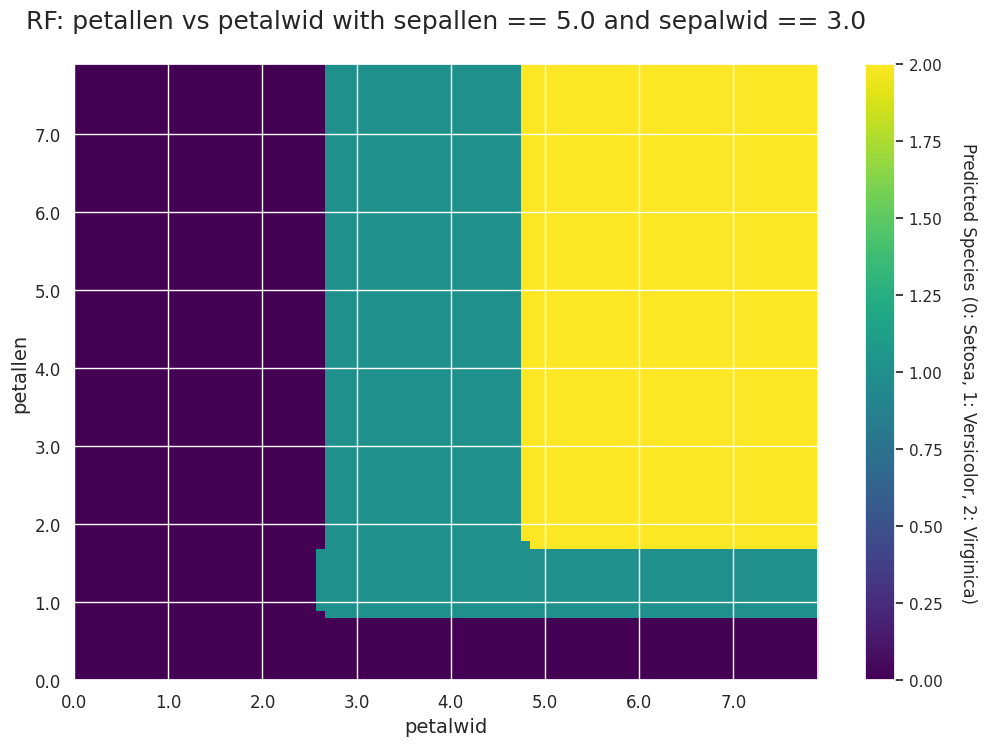

Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

#sns.set(rc = {'figure.figsize':(18,12)})  # figure size!

fig, ax = plt.subplots(figsize=(12,8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("petalwid", fontsize=14)
ax.set_ylabel("petallen", fontsize=14)

ax.set_title(f"RF: petallen vs petalwid with sepallen == {sepallen:.1f} and sepalwid == {sepalwid:.1f}\n", fontsize=18)
# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)
# Ensure that the last index is included
# if reduced_tick_indices[-1] != len(HORIZONT)-1:
#   reduced_tick_indices = np.append(reduced_tick_indices, len(HORIZONT)-1)


# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Setosa, 1: Versicolor, 2: Virginica)', rotation=270, labelpad=25)

plt.show()

print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

We've done it!

Remember that the model _thinks_ it knows everything...

The _feature importances_ are probably what it knows the best:

In [ ]:
rforest_model_tuned.feature_importances_

array([0.12857042, 0.00782149, 0.41510174, 0.44850634])

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "births.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()
df_tidy['above/below median'] = df_tidy['above/below median'].map({'below': 0, 'above': 1})

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 0
df_model1 = df_tidy[['month', 'day']]  # keep only these two
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
BIRTHS = ['below','above']   # int to str
BIRTHS_INDEX = { s:i for i,s in enumerate(BIRTHS) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {BIRTHS = } \n {BIRTHS_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = df_model1.to_numpy()
y_all = df_tidy['above/below median'].to_numpy()
#X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
#y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a classifier with best_depth =", best_depth)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = dtree_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
best_accuracy = 0.0  # also not correct...
for depth in range(1,21):    # Note that we are cross-validating using only our TRAINING data!
    dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)   # build a knn_model for every k
    cv_scores = cross_val_score( dtree_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"depth: {depth:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_depth = depth                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_depth = {best_depth}  \n    yields the highest cv accuracy: {best_accuracy}\n")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", dtree_model_final.feature_importances_)

Cross-validating...
best_depth = 3  
    yields the highest cv accuracy: 0.8251977401129944

Created and trained a classifier with best_depth = 3


In [ ]:
VERTICAL = np.arange(1, 32, 1)  # days: 1 to 31
HORIZONT = np.arange(1, 13, 1)  # months: 1 to 12
PLANE = np.zeros((len(VERTICAL), len(HORIZONT)))  # [rows, cols]

MODEL = dtree_model_final
above = 4.0
below = 2.0

# Fill the plane
for row, day in enumerate(VERTICAL):      # Y-axis = day (rows)
    for col, month in enumerate(HORIZONT):  # X-axis = month (columns)
        features = [month, day]
        output = MODEL.predict([features])[0]
        PLANE[row, col] = above if output == 1 else below
    print(".", end="")
print("\n", PLANE[:3, :3])  # preview corner


...............................
 [[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


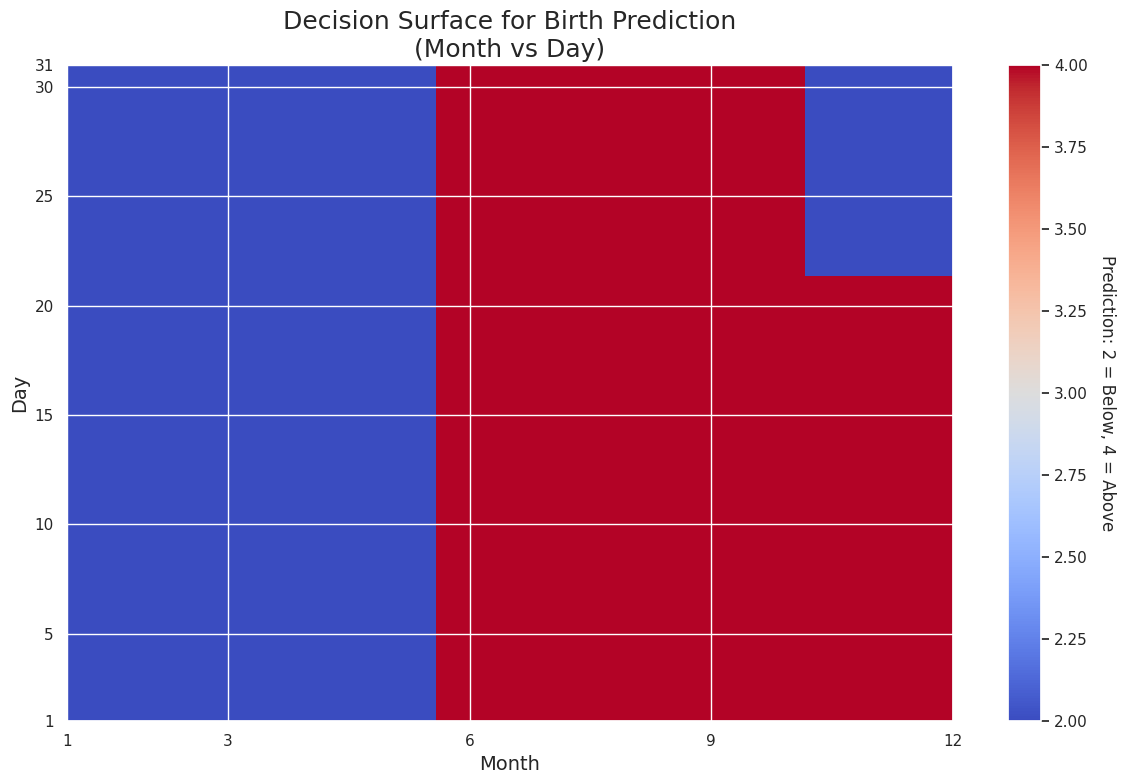

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

im = ax.imshow(
    PLANE,
    cmap="coolwarm",
    extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()],
    origin="lower",
    aspect="auto"
)

ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Day", fontsize=14)
ax.set_title("Decision Surface for Birth Prediction\n(Month vs Day)", fontsize=18)

# ✅ INSERT HERE — customize Y ticks to show day 31
ax.set_yticks([1, 5, 10, 15, 20, 25, 30, 31])
ax.set_yticklabels([str(d) for d in [1, 5, 10, 15, 20, 25, 30, 31]])

# Optional: set X ticks too if you like
ax.set_xticks([1, 3, 6, 9, 12])
ax.set_xticklabels([str(m) for m in [1, 3, 6, 9, 12]])

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label("Prediction: 2 = Below, 4 = Above", rotation=270, labelpad=20)

plt.tight_layout()
plt.show()


In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "births.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()
df_tidy['above/below median'] = df_tidy['above/below median'].map({'below': 0, 'above': 1})


# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 0
df_model1 = df_tidy[['month', 'day']]  # keep only these two
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
BIRTHS = ['below','above']   # int to str
BIRTHS_INDEX = { s:i for i,s in enumerate(BIRTHS) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {BIRTHS = } \n {BIRTHS_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = df_model1.to_numpy()
y_all = df_tidy['above/below median'].to_numpy()
#X_all = A[:,0:2]  # X (features) WATCH OUT! This is likely to change from model to model...
#y_all = A[:,2]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier
best_d = 1            # we don't know what depth to use, so let's guess 1 (not a good guess)
best_num_trees = 42   # we don't know how many trees to use, so let's guess 42
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)  # 0.5 of the data each tree
rforest_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print(f"Built a Random Forest with depth={best_d} and number of trees={best_num_trees}")

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = rforest_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 1         # range(1,6)
best_num_trees = 50   # [50,150,250]
best_accuracy = 0
for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, n_estimators=ntrees,max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if True: print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy;   best_d = d;      best_num_trees = ntrees
if True: print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

# Section 11:  Here's where the model-building happens with the best-found parameters:
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, n_estimators=best_num_trees, max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", rforest_model_tuned.feature_importances_)

Cross-validating...
depth:  1 ntrees:  50 cv accuracy:  0.8079
depth:  1 ntrees: 150 cv accuracy:  0.8011
depth:  1 ntrees: 250 cv accuracy:  0.8045
depth:  2 ntrees:  50 cv accuracy:  0.8112
depth:  2 ntrees: 150 cv accuracy:  0.8111
depth:  2 ntrees: 250 cv accuracy:  0.8179
depth:  3 ntrees:  50 cv accuracy:  0.8179
depth:  3 ntrees: 150 cv accuracy:  0.8212
depth:  3 ntrees: 250 cv accuracy:  0.8179
depth:  4 ntrees:  50 cv accuracy:  0.8281
depth:  4 ntrees: 150 cv accuracy:  0.8282
depth:  4 ntrees: 250 cv accuracy:  0.8449
depth:  5 ntrees:  50 cv accuracy:  0.8449
depth:  5 ntrees: 150 cv accuracy:  0.8416
depth:  5 ntrees: 250 cv accuracy:  0.8416
best_depth: 3 and best_num_trees: 50 are our choices. Acc: 0.8449152542372882
Created and trained a classifier with best_depth = 3


One of the forest's trees is DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=2062397069)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="day <= 20.5\ngini = 0.499\nsamples = 150\nvalue = [96, 90]\nclass = below", fillcolor="#fdf7f3"] ;
1 [label="month <= 6.5\ngini = 0.498\nsamples = 93\nvalue = [52, 59]\nclass = above", fillcolor="#e8f3fc"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="month <= 1.5\ngini = 0.352\nsamples = 47\nvalue = [44, 13]\nclass = below", fillcolor="#eda674"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 6\nvalue = [7, 0]\nclass = below", fillcolor="#e58139"] ;
2 -> 3 ;
4 [label="gini = 0.385\nsamples = 41\nvalue = [37, 13]\nclass = below", fillcolor="#eead7f"] ;
2 -> 4 ;
5 [label="month <= 10.5\ngin

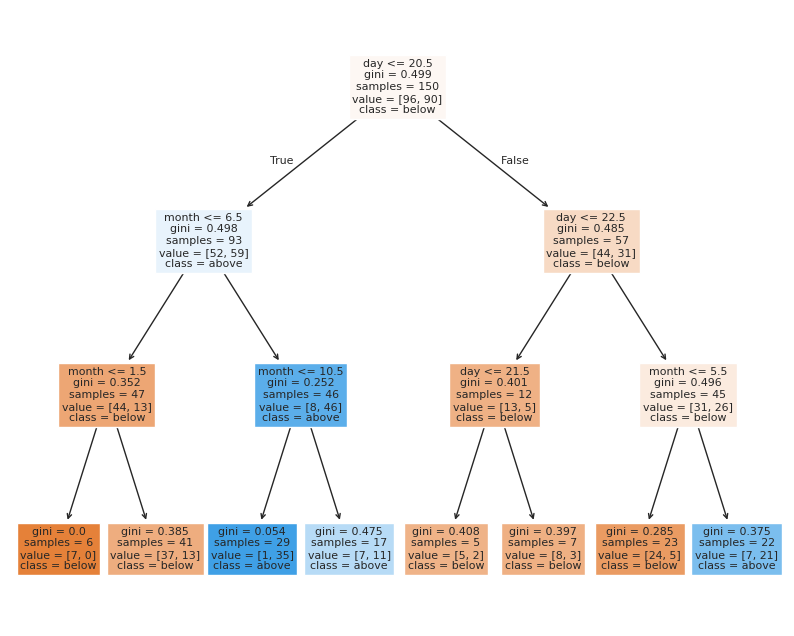

In [ ]:
#
# we can get the individual trees, if we want...  Let's try it on tree #28
#
FEATURES = ['month', 'day']
BIRTHS = ['below', 'above']
tree_index = 28   # which tree
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=BIRTHS,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

# One tree:
fig = plt.figure(figsize=(10,8))
tree_plot = tree.plot_tree(one_rf_tree,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=BIRTHS,      # and these!!
                   filled=True)

In [ ]:
#
# final predictive model (random forests), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_births = Model.predict(our_features)       # The model's prediction!
    predicted_births = int(round(predicted_births[0]))  # unpack the extra brackets
    return predicted_births

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [11,11]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoF = [
[1,1 ],   # actually setosa
[2,2],   # actually versicolor
[3,3 ],   # actually virginica
[5,5 ],   # actually setosa
[7,7 ],   # actually setosa
[8,8 ],   # actually versicolor
[9,9 ],   # actually versicolor
[10,10 ],   # actually virginica
[12,12 ],   # actually virginica  <-- almost always wrong!
]

# run on each one:
for Features in LoF:
    predicted_births = predictive_model( Features, rforest_model_tuned )  # pass in the model, too!
    name = BIRTHS[predicted_births]
    print(f"from the features {Features} I predict {name}")    # Answers in the assignment...

from the features [1, 1] I predict below
from the features [2, 2] I predict below
from the features [3, 3] I predict below
from the features [5, 5] I predict below
from the features [7, 7] I predict above
from the features [8, 8] I predict above
from the features [9, 9] I predict above
from the features [10, 10] I predict above
from the features [12, 12] I predict above


In [ ]:
VERTICAL = np.arange(1, 32)  # Days 1 to 31
HORIZONT = np.arange(1, 13)  # Months 1 to 12
PLANE = np.zeros((len(VERTICAL), len(HORIZONT)))  # rows = days, cols = months

MODEL = rforest_model_tuned  # <-- This must be the tuned random forest

above = 4.0
below = 2.0

for row, day in enumerate(VERTICAL):
    for col, month in enumerate(HORIZONT):
        features = [month, day]
        prediction = MODEL.predict([features])[0]
        PLANE[row, col] = above if prediction == 1 else below


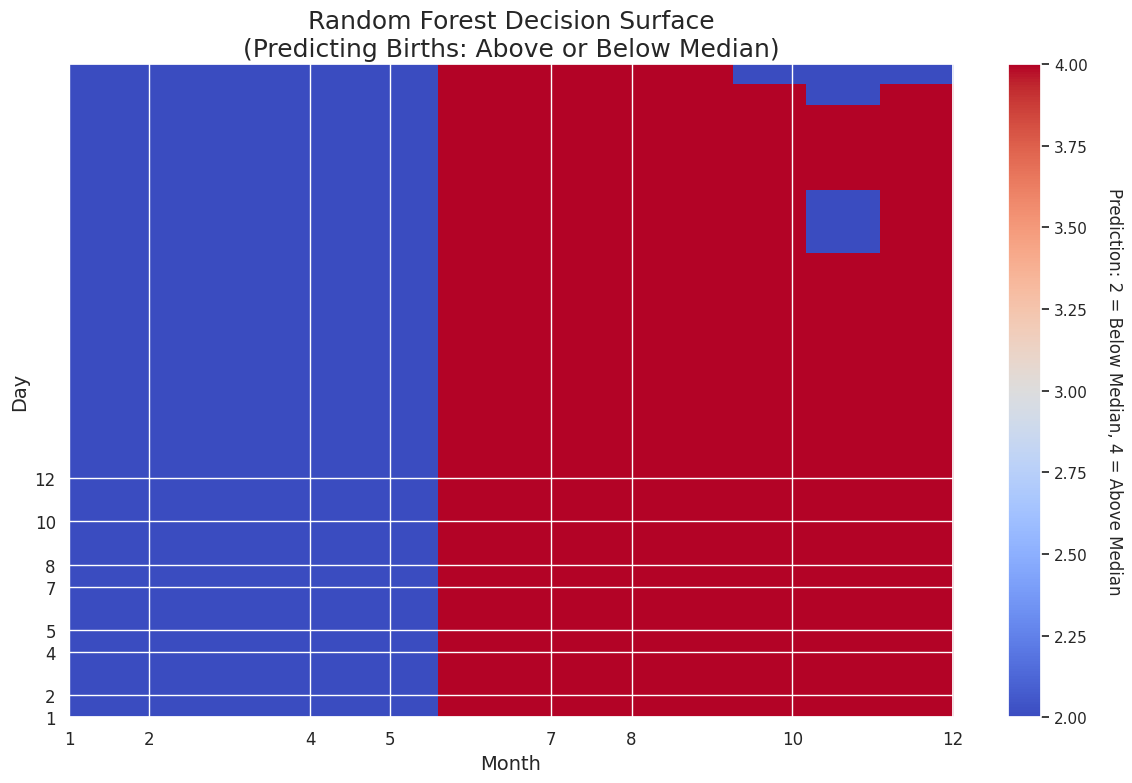

Remember our prediction-to-value mapping:
2 - below median
4 - above median


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Create the heatmap
im = ax.imshow(
    PLANE,
    cmap="coolwarm",  # use a diverging color map for 2-class predictions
    extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()],
    origin="lower",
    aspect="auto"
)

# Set axis labels and title
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Day", fontsize=14)
ax.set_title("Random Forest Decision Surface\n(Predicting Births: Above or Below Median)", fontsize=18)

# Custom tick spacing
reduced_tick_indices = np.linspace(0, len(HORIZONT) - 1, 8, dtype=int)
ax.set_xticks(HORIZONT[reduced_tick_indices])
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{int(x)}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)
ax.set_yticklabels([f"{int(y)}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Prediction: 2 = Below Median, 4 = Above Median', rotation=270, labelpad=25)

plt.tight_layout()
plt.show()

print("Remember our prediction-to-value mapping:")
print("2 - below median")
print("4 - above median")

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "digits.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

df_tidy = df_tidy.drop(columns=['excerpted from http://yann.lecun.com/exdb/mnist/'])

# Section 3:  Drop any columns we don't want to use
columns_to_keep = [f'pix{i}' for i in range(15)] + ['actual_digit']
df_model1 = df_tidy[columns_to_keep].copy()

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
DIGITS = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']   # int to str
DIGITS_INDEX = { s:i for i,s in enumerate(DIGITS) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {DIGITS = } \n {DIGITS_INDEX = }")


# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
x_all = df_model1.to_numpy()
y_all = df_tidy['actual_digit'].to_numpy()
#X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
#y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a classifier with best_depth =", best_depth)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = dtree_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
best_accuracy = 0.0  # also not correct...
for depth in range(1,21):    # Note that we are cross-validating using only our TRAINING data!
    dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)   # build a knn_model for every k
    cv_scores = cross_val_score( dtree_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"depth: {depth:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_depth = depth                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_depth = {best_depth}  \n    yields the highest cv accuracy: {best_accuracy}\n")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", dtree_model_final.feature_importances_)

Cross-validating...
best_depth = 12  
    yields the highest cv accuracy: 0.5311380096734581

Created and trained a classifier with best_depth = 12


In [ ]:
# Choose two pixels to vary
PIX1 = 10  # first pixel to vary
PIX2 = 12  # second pixel to vary

# Constants for other 62 pixels
constant_value = 0.0
fixed_pixels = [constant_value] * 15

VERTICAL = np.arange(0, 8, 0.1)   # values for PIX2 (y-axis)
HORIZONT = np.arange(0, 8, 0.1)   # values for PIX1 (x-axis)
PLANE = np.zeros((len(VERTICAL), len(HORIZONT)))  # [rows, cols]

MODEL = dtree_model_final

# Fill the plane
for row, pix2_val in enumerate(VERTICAL):
    for col, pix1_val in enumerate(HORIZONT):
        features = fixed_pixels.copy()
        features[PIX1] = pix1_val
        features[PIX2] = pix2_val
        output = MODEL.predict([features])[0]
        PLANE[row, col] = output
    print(".", end="")
print("\nPreview:\n", PLANE[:3, :3])


................................................................................
Preview:
 [[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]


<ipython-input-116-7e8c2d829f83>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Pixel', y='Importance', palette="viridis")


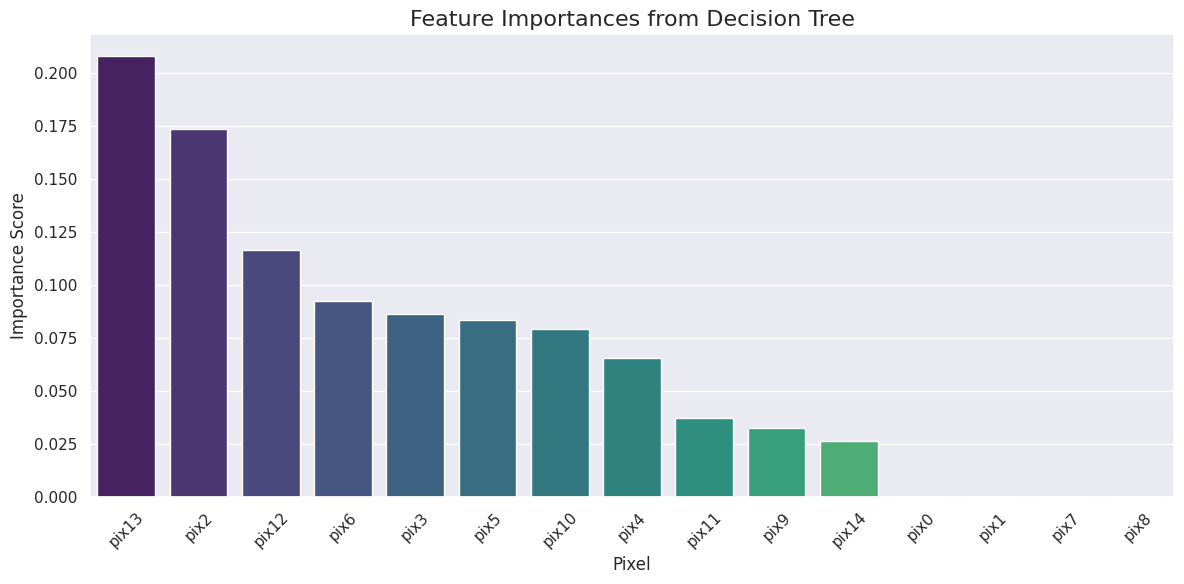

In [ ]:
# Plotting feature importances from the trained decision tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dtree_model_final is your trained decision tree
feature_importances = dtree_model_final.feature_importances_
features = [f'pix{i}' for i in range(15)]

# Create a DataFrame and sort by importance
importance_df = pd.DataFrame({
    'Pixel': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Pixel', y='Importance', palette="viridis")
plt.title("Feature Importances from Decision Tree", fontsize=16)
plt.ylabel("Importance Score")
plt.xlabel("Pixel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "digits.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
columns_to_keep = [f'pix{i}' for i in range(15)] + ['actual_digit']
df_model1 = df_tidy[columns_to_keep].copy()

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
DIGITS = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']   # int to str
DIGITS_INDEX = { s:i for i,s in enumerate(DIGITS) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {DIGITS = } \n {DIGITS_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = df_model1.drop(columns=['actual_digit']).to_numpy().astype('float64')  # 64 pixel features
y_all = df_model1['actual_digit'].to_numpy()
#X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
#y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier
best_d = 1            # we don't know what depth to use, so let's guess 1 (not a good guess)
best_num_trees = 42   # we don't know how many trees to use, so let's guess 42
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)  # 0.5 of the data each tree
rforest_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print(f"Built a Random Forest with depth={best_d} and number of trees={best_num_trees}")

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = rforest_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 1         # range(1,6)
best_num_trees = 50   # [50,150,250]
best_accuracy = 0
for d in range(1,26):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, n_estimators=ntrees,max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if True: print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy;   best_d = d;      best_num_trees = ntrees
if True: print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

# Section 11:  Here's where the model-building happens with the best-found parameters:
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, n_estimators=best_num_trees, max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", rforest_model_tuned.feature_importances_)

Cross-validating...
depth:  1 ntrees:  50 cv accuracy:  0.4243
depth:  1 ntrees: 150 cv accuracy:  0.4364
depth:  1 ntrees: 250 cv accuracy:  0.4356
depth:  2 ntrees:  50 cv accuracy:  0.4809
depth:  2 ntrees: 150 cv accuracy:  0.4957
depth:  2 ntrees: 250 cv accuracy:  0.4922
depth:  3 ntrees:  50 cv accuracy:  0.5113
depth:  3 ntrees: 150 cv accuracy:  0.5340
depth:  3 ntrees: 250 cv accuracy:  0.5269
depth:  4 ntrees:  50 cv accuracy:  0.5467
depth:  4 ntrees: 150 cv accuracy:  0.5566
depth:  4 ntrees: 250 cv accuracy:  0.5658
depth:  5 ntrees:  50 cv accuracy:  0.5721
depth:  5 ntrees: 150 cv accuracy:  0.5820
depth:  5 ntrees: 250 cv accuracy:  0.5955
depth:  6 ntrees:  50 cv accuracy:  0.5983
depth:  6 ntrees: 150 cv accuracy:  0.6103
depth:  6 ntrees: 250 cv accuracy:  0.6181
depth:  7 ntrees:  50 cv accuracy:  0.6202
depth:  7 ntrees: 150 cv accuracy:  0.6351
depth:  7 ntrees: 250 cv accuracy:  0.6301
depth:  8 ntrees:  50 cv accuracy:  0.6238
depth:  8 ntrees: 150 cv accuracy:

One of the forest's trees is DecisionTreeClassifier(max_depth=12, max_features='sqrt',
                       random_state=738954693)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix10 <= 9.5\ngini = 0.899\nsamples = 691\nvalue = [79, 105, 83, 78, 98, 86, 98, 83, 88, 86]\nclass = 1", fillcolor="#fffffd"] ;
1 [label="pix5 <= 7.5\ngini = 0.811\nsamples = 271\nvalue = [7.0, 88.0, 6.0, 13.0, 89.0, 3.0, 76.0, 32.0, 19.0\n19.0]\nclass = 4", fillcolor="#feffff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix11 <= 12.5\ngini = 0.745\nsamples = 185\nvalue = [7, 46, 1, 8, 83, 1, 72, 5, 10, 5]\nclass = 4", fillcolor="#f2fdfb"] ;
1 -> 2 ;
3 [label="pix3 <= 8.0\ngini = 0.624\nsamples = 34\nvalue = [0.0, 6.0, 0.0, 6.0, 27.0, 0.0, 5.0, 1.0, 0.0, 2.0]\nclass = 4", fillcolo

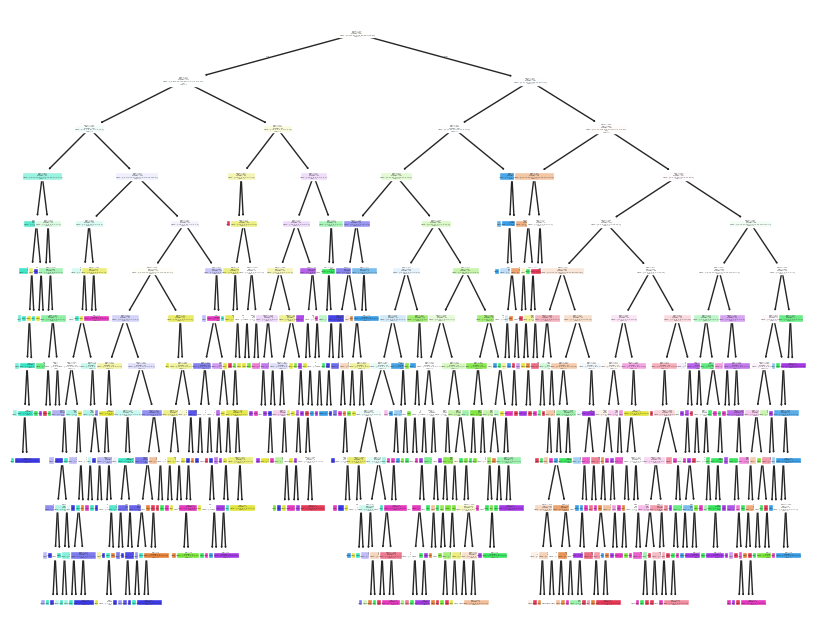

In [ ]:
#
# we can get the individual trees, if we want...  Let's try it on tree #28
#
tree_index = 28   # which tree
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

FEATURES = [f'pix{i}' for i in range(15)]  # This gives you a list of 15 feature names

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=DIGITS,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

# One tree:
fig = plt.figure(figsize=(10,8))
tree_plot = tree.plot_tree(one_rf_tree,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=DIGITS,      # and these!!
                   filled=True)

In [ ]:
#
# final predictive model (random forests), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_digits = Model.predict(our_features)       # The model's prediction!
    predicted_digits = int(round(predicted_digits[0]))  # unpack the extra brackets
    return predicted_digits

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoF = [ [11,11,9,1,3,4,5,6,7,8,10,0,1,4,5],
                   [11,10,9,1,3,4,5,6,7,8,10,0,1,4,5],
                   [2,29,9,1,3,4,5,6,7,8,10,0,1,4,5],
                   [2,29,0,0,1,0,5,5,7,8,10,0,1,4,5],
                   [7,14,9,1,3,4,5,6,7,8,10,0,1,4,5],
                   [1,30,0,0,1,0,5,5,7,8,10,0,1,4,5],        # -4.7? .01?  0?
                   [7,14,16,0,1,0,5,5,7,8,10,0,1,4,5],
                   [1,30,16,0,1,0,5,5,7,8,10,0,1,4,5],
                   [4,30,0,0,0,0,16,9,8,10,0,6,6,16,1],        # -4.7? .01?  0?
                   ]

# run on each one:
for Features in LoF:
    predicted_digits = predictive_model( Features, rforest_model_tuned )  # pass in the model, too!
    name = DIGITS[predicted_digits]
    print(f"from the features {Features} I predict {name}")    # Answers in the assignment...

from the features [11, 11, 9, 1, 3, 4, 5, 6, 7, 8, 10, 0, 1, 4, 5] I predict 8
from the features [11, 10, 9, 1, 3, 4, 5, 6, 7, 8, 10, 0, 1, 4, 5] I predict 8
from the features [2, 29, 9, 1, 3, 4, 5, 6, 7, 8, 10, 0, 1, 4, 5] I predict 8
from the features [2, 29, 0, 0, 1, 0, 5, 5, 7, 8, 10, 0, 1, 4, 5] I predict 9
from the features [7, 14, 9, 1, 3, 4, 5, 6, 7, 8, 10, 0, 1, 4, 5] I predict 8
from the features [1, 30, 0, 0, 1, 0, 5, 5, 7, 8, 10, 0, 1, 4, 5] I predict 9
from the features [7, 14, 16, 0, 1, 0, 5, 5, 7, 8, 10, 0, 1, 4, 5] I predict 8
from the features [1, 30, 16, 0, 1, 0, 5, 5, 7, 8, 10, 0, 1, 4, 5] I predict 8
from the features [4, 30, 0, 0, 0, 0, 16, 9, 8, 10, 0, 6, 6, 16, 1] I predict 4


In [ ]:
# Choose two pixels to vary
PIX1 = 10  # first pixel to vary
PIX2 = 12  # second pixel to vary

# Constants for other 62 pixels
constant_value = 0.0
fixed_pixels = [constant_value] * 15

VERTICAL = np.arange(0, 8, 0.1)   # values for PIX2 (y-axis)
HORIZONT = np.arange(0, 8, 0.1)   # values for PIX1 (x-axis)
PLANE = np.zeros((len(VERTICAL), len(HORIZONT)))  # [rows, cols]

MODEL = dtree_model_final

# Fill the plane
for row, pix2_val in enumerate(VERTICAL):
    for col, pix1_val in enumerate(HORIZONT):
        features = fixed_pixels.copy()
        features[PIX1] = pix1_val
        features[PIX2] = pix2_val
        output = MODEL.predict([features])[0]
        PLANE[row, col] = output
    print(".", end="")
print("\nPreview:\n", PLANE[:3, :3])


................................................................................
Preview:
 [[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]]


<ipython-input-129-7e8c2d829f83>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Pixel', y='Importance', palette="viridis")


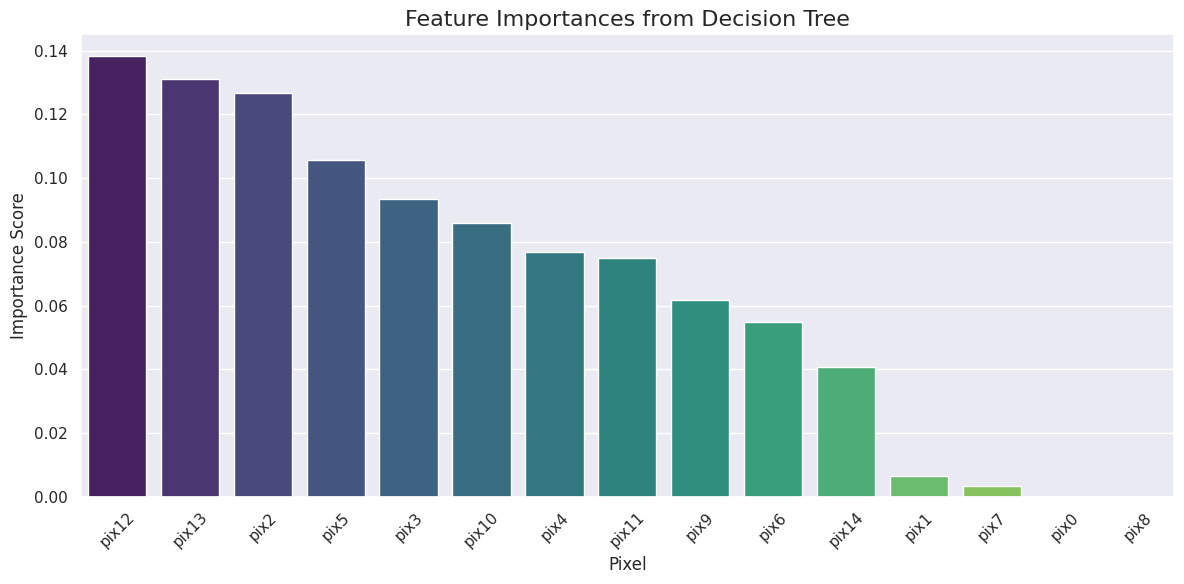

In [ ]:
# Plotting feature importances from the trained decision tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dtree_model_final is your trained decision tree
feature_importances = dtree_model_final.feature_importances_
features = [f'pix{i}' for i in range(15)]

# Create a DataFrame and sort by importance
importance_df = pd.DataFrame({
    'Pixel': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Pixel', y='Importance', palette="viridis")
plt.title("Feature Importances from Decision Tree", fontsize=16)
plt.ylabel("Importance Score")
plt.xlabel("Pixel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<br>
<hr>
<br>

# Your tasks!

Based on the examples above, your task is to build a DT+RF model (along with the tests and visualizations) for two datasets:

*   the births dataset and
*   the digits dataset

<br>
<hr>
<br>

Suggestion:  Perhaps open this notebook twice...

_Then you can copy-paste-adapt the iris workflow to each new dataset!_

<br>
<hr>
<br>

As optional EC, track down another dataset of your own choosing and build a DT+RF model  

Notice that this can be an excellent final project, too! 😃